# Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mylib.fonction_exploration import exploration1, exploration2, exploration3, exploration4
from mylib.fonction_pk import test_pk
from mylib.fonction_merge import df_merge
from mylib.fonction_acp import display_circles, display_factorial_planes, display_scree_plot
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
from IPython.display import display_html 

from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
#from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
red = "\033[31m"
end = "\033[0;0m"

chemin = '../src/df_2013_cleaned.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement du fichier nettoyé

In [2]:
p9 = pd.read_csv(chemin)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploration

In [4]:
exploration1(p9)

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
0,AFG,Afghanistan,31541209,20.700000,0.474000,3.377000,52.870000,0,1821000000,78000000,149000000,48.000000,6.950000,5500.665000,2062.059176,15.175663,-71000000,4.863995,-5.095541
1,ZAF,South Africa,53873616,4.300000,0.704000,2.334000,172.340000,1,16959000000,3547000000,395000000,92.000000,6.400000,8769.679000,13559.840574,5.281993,3152000000,142.452309,-2.469136
2,ALB,Albania,2895092,5.000000,0.785000,1.968000,304.110000,1,1573000000,61000000,112000000,14.000000,1.670000,1499.451000,10574.093662,-1.107661,-51000000,239.223338,25.842697
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
142,ECU,Ecuador,15722989,8.800000,0.755000,2.119000,86.120000,0,2019000000,119000000,274000000,96.000000,7.270000,9561.102000,11142.678362,6.648841,-155000000,42.290699,-60.575540
143,USA,United States,316059947,2.500000,0.917000,2.257000,183.560000,1,427983000000,34600000000,15510000000,1.500000,2.870000,7456.767000,53291.127689,3.027797,19090000000,1170.559698,29.638917
144,ETH,Ethiopia,97084366,17.700000,0.441000,2.502000,108.810000,1,14554000000,427000000,42000000,56.913460,18.150000,5368.907000,1261.113300,11.905609,385000000,41.100852,-56.250000
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
12,BGD,Bangladesh,154030139,15.000000,0.574000,2.168000,83.760000,0,14907000000,45000000,1896000000,168.000000,12.860000,7943.799000,3734.725651,4.991813,-1851000000,13.019761,32.494759
128,TGO,Togo,7106229,19.400000,0.499000,1.951000,292.740000,1,2536000000,3000000,33000000,74.500000,12.880000,4402.306000,1677.808104,11.058706,-30000000,64.130008,26.923077


In [5]:
exploration2(p9)

,Nombre de valeurs totales,Type des données,Nombre de NaN,NaN en %,Nombre de valeurs uniques,Valeurs uniques en%
iso,145,object,0,0.00,145,100.00
Country,145,object,0,0.00,145,100.00
Population,145,int64,0,0.00,145,100.00
Under-nourishment (%),145,float64,0,0.00,78,53.79
HDI,145,float64,0,0.00,125,86.21
Peace_index,145,float64,0,0.00,143,98.62
Vegetables disponibility (kg/cap/year),145,float64,0,0.00,144,99.31
Enough veg intake (> 91.25 kg/cap/year),145,int64,0,0.00,2,1.38
Production,145,int64,0,0.00,145,100.00
Exportations,145,int64,0,0.00,116,80.00


In [6]:
exploration3(p9)


---------------------------------------
Nombre de lignes et de colonnes (shape)
--------------------------------------- 

(145, 19) 

--------------------------------------
Affichage des NaN (isna().any(axis=1))
-------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-nourishment (%), HDI, Peace_index, Vegetables disponibility (kg/cap/year), Enough veg intake (> 91.25 kg/cap/year), Production, Exportations, Importations, Customs duration (h), Customs tax (%), Distance (km), Gdp/cap, Population evolution (4y, %), Trade balance (exp-imp), Self-sufficiency (prod-dispo), Market growth (2y, %)]
Index: [] 

---------------------------------------
Nombre de doublons (duplicated().sum())
--------------------------------------- 

0 

-----------------------------------------------------
Affichage des doublons (df[df.duplicated()].head(10))
----------------------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-

In [7]:
exploration4(p9)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iso,145,145,AFG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,145,145,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,145.00,NaN,NaN,NaN,48208941.06,159491783.33,323764.00,4791535.00,10743349.00,33803527.00,1363240000.00
Under-nourishment (%),145.00,NaN,NaN,NaN,9.28,9.02,2.50,2.50,5.40,13.80,43.70
HDI,145.00,NaN,NaN,NaN,0.71,0.16,0.36,0.56,0.73,0.84,0.95
Peace_index,145.00,NaN,NaN,NaN,2.03,0.42,1.15,1.77,2.05,2.30,3.38
Vegetables disponibility (kg/cap/year),145.00,NaN,NaN,NaN,192.69,93.43,41.17,126.46,170.81,248.06,467.80
Enough veg intake (> 91.25 kg/cap/year),145.00,NaN,NaN,NaN,0.88,0.32,0.00,1.00,1.00,1.00,1.00
Production,145.00,NaN,NaN,NaN,20661448275.86,87755036264.07,13000000.00,1110000000.00,3036000000.00,11644000000.00,938796000000.00
Exportations,145.00,NaN,NaN,NaN,1909020689.66,5190462116.11,0.00,14000000.00,118000000.00,740000000.00,34600000000.00


In [8]:
p9.sample()

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
52,HUN,Hungary,9893082,2.50,0.84,1.52,126.49,1,8735000000,2905000000,451000000,0.00,2.21,1264.66,24556.72,-1.29,2454000000,756.45,-3.22


# Vérification des outliers en prévision de l'ACP

In [9]:
# on détermine les colonnes numériques
num = []
for i in p9.columns:
    if p9[i].dtypes == int or p9[i].dtypes == float:
        num.append(i)

## Z-score

In [10]:
# on calcule le z-score sur toutes les variables numériques
for i in num:
    p9.sort_values(by=i, inplace=True)
    outlier_z = p9[stats.zscore(p9[i]) > 1.96]
    nb_outlier_z = len(outlier_z)
    print(bold + f"\n{i} : {nb_outlier_z} outliers \n\n" + end + f"{outlier_z[['Country', i]]} \n" + "-" * 50)


Population : 2 outliers 

   Country  Population
53   India  1291132063
26   China  1363240000 
--------------------------------------------------

Under-nourishment (%) : 8 outliers 

                      Country  Under-nourishment (%)
29                Congo, Rep.                  28.20
74                 Madagascar                  33.00
137               Yemen, Rep.                  34.30
107                    Rwanda                  34.80
112          Congo, Dem. Rep.                  35.10
71                    Liberia                  36.10
108  Central African Republic                  40.20
50                      Haiti                  43.70 
--------------------------------------------------

HDI : 0 outliers 

Empty DataFrame
Columns: [Country, HDI]
Index: [] 
--------------------------------------------------

Peace_index : 5 outliers 

                      Country  Peace_index
112          Congo, Dem. Rep.         2.95
41         Russian Federation         2.98
108  C

## Log

In [11]:
p9_log = p9.copy()
p9_log = p9_log.set_index(['Country'])
p9_log = p9_log[num]
p9_log.sample()

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Namibia,2204510,22.20,0.61,1.88,100.21,1,135000000,43000000,234000000,120.00,6.76,7775.10,9863.58,6.61,-191000000,-38.97,341.51


### Graphiques de distribution

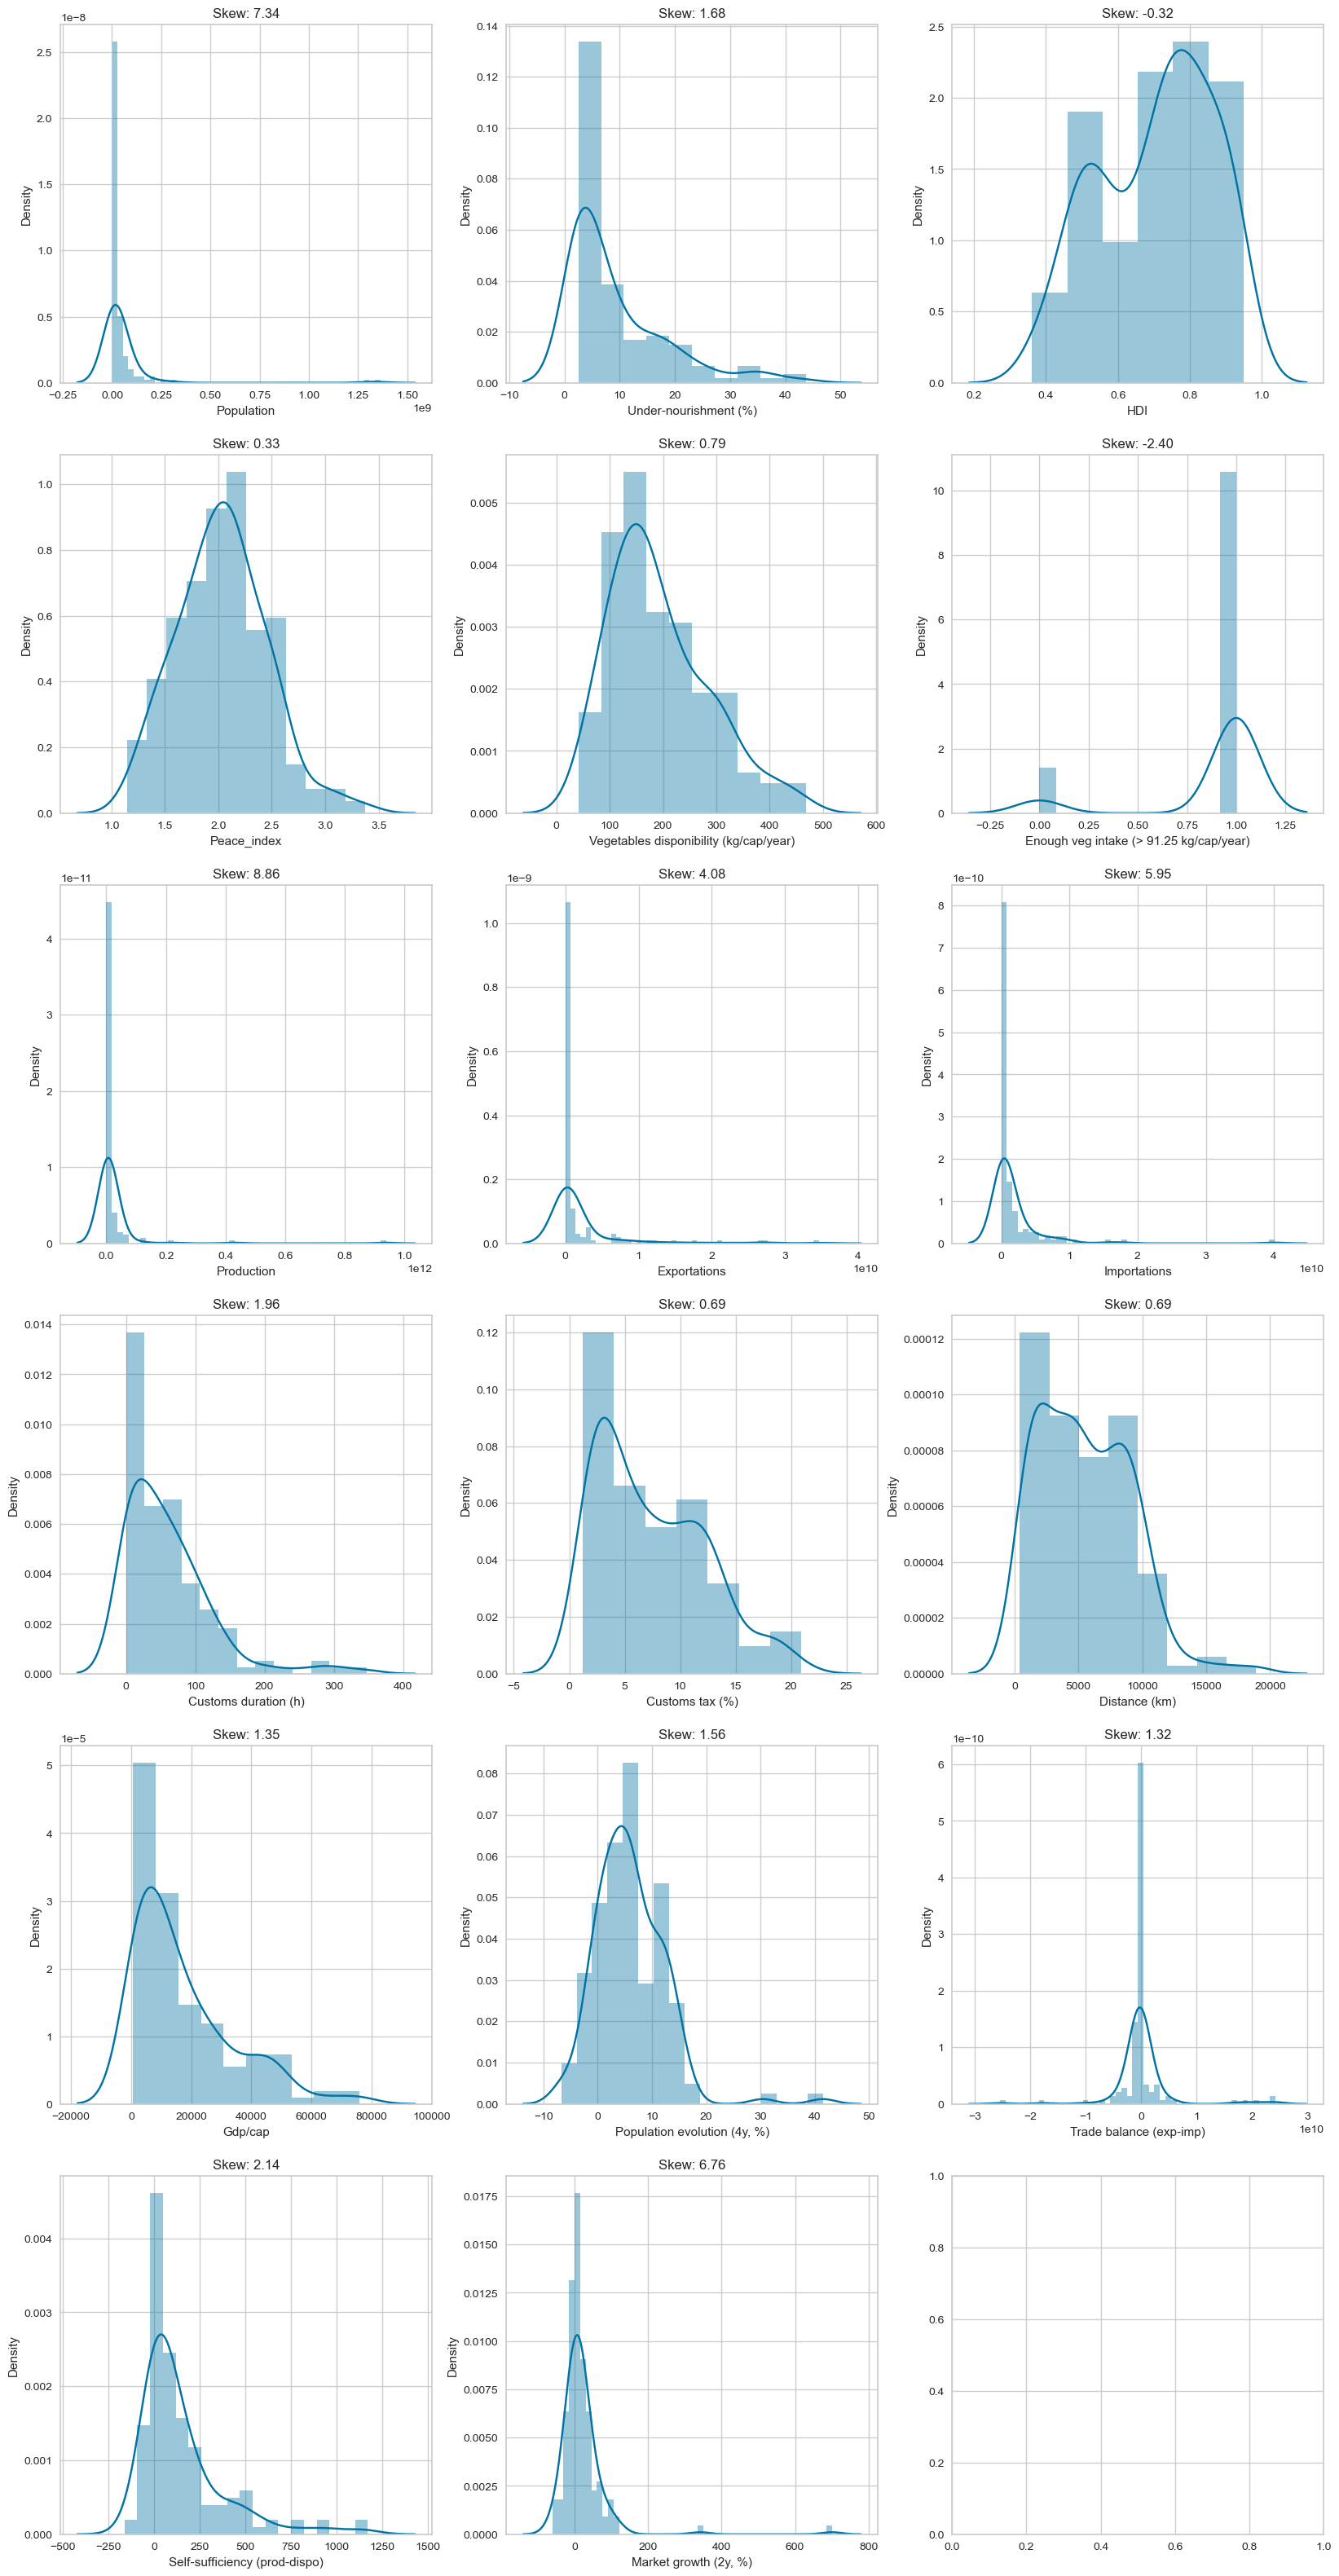

In [12]:
f, a = plt.subplots(6, 3, figsize=(20,40))
a = a.flatten()
for i, col in enumerate(p9_log.columns):
    sns.distplot(p9_log[col], ax=a[i], kde= True).set_title('Skew: {:.2f}'.format(p9_log[col].skew()))
plt.show()

### Calcul de Skew et Kurtosis

In [13]:
#Calculating Skew and Kurtosis 
for i in p9_log.columns:
    kurtosis = round((stats.kurtosis(p9_log[i])), ndigits=2)
    skew = round((stats.skew(p9_log[i])), ndigits=2)
    #print("\nkurtosis :", i, kurtosis) 
    #print("skew", i, skew, "\n")
    print("\n" + "-" * 50 + bold + f"\n{i} : kurtosis {kurtosis}" + end)
    print(bold + f"{i} : skew {skew} \n" + end)
#Interpreting Kurtosis
    if  -0.5 < kurtosis < 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is approximately normal sometimes called mesokurtic distributions')
    elif kurtosis <= -0.5: 
        print (f'A kurtosis of {kurtosis} means the distribution is light-tailed (negative) sometimes called a platykurtic distributions')
    elif kurtosis >= 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution')
#Interpreting Skewness
    if -0.5 < skew < 0.5:
        print (f'A skew of {skew} means the distribution is approx. symmetric')
    elif  -1 < skew < -0.5 or 0.5 < skew < 1.0:
        print (f'A skew of {skew} means the distribution is moderately skewed')
    else:
        print (f'A skew of {skew} means the distribution is highly skewed')


--------------------------------------------------
Population : kurtosis 55.2
Population : skew 7.26 

A kurtosis of 55.2 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 7.26 means the distribution is highly skewed

--------------------------------------------------
Under-nourishment (%) : kurtosis 2.42
Under-nourishment (%) : skew 1.67 

A kurtosis of 2.42 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 1.67 means the distribution is highly skewed

--------------------------------------------------
HDI : kurtosis -1.02
HDI : skew -0.32 

A kurtosis of -1.02 means the distribution is light-tailed (negative) sometimes called a platykurtic distributions
A skew of -0.32 means the distribution is approx. symmetric

--------------------------------------------------
Peace_index : kurtosis 0.23
Peace_index : skew 0.33 

A kurtosis of 0.23 means the distribution is approximately no

### Test de normalité

In [14]:
# calculate
for i in p9_log.columns:
    stat, p = stats.normaltest(p9_log[i])
    print (bold + f'{i}' + end + f': \nStatistic={stat}, p={p}')
   # print ('--'*25) 

# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print ('--'*25) 
    else:
        print('Sample does not look Gaussian (reject H0)')
        print ('--'*25) 

Population: 
Statistic=236.5571429232481, p=4.288141293204864e-52
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Under-nourishment (%): 
Statistic=52.22564526412218, p=4.563995672725922e-12
Sample does not look Gaussian (reject H0)
--------------------------------------------------
HDI: 
Statistic=27.314167223437668, p=1.171666326474379e-06
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Peace_index: 
Statistic=3.40915914299204, p=0.1818488245350588
Sample looks Gaussian (fail to reject H0)
--------------------------------------------------
Vegetables disponibility (kg/cap/year): 
Statistic=13.566854388659989, p=0.001132387328963928
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Enough veg intake (> 91.25 kg/cap/year): 
Statistic=78.94086160869695, p=7.214557570418701e-18
Sample does not look Gaussian (reject H0)
--------------------------------------

In [15]:
#pip install outliers

In [16]:
#import numpy as np
#from OUTLIERS import smirnov_grubbs as grubbs

#grubbs.max_test(p9.Population, alpha=.01)

### Mise en log des colonnes éligibles

In [17]:
p9.columns

Index(['iso', 'Country', 'Population', 'Under-nourishment (%)', 'HDI',
       'Peace_index', 'Vegetables disponibility (kg/cap/year)',
       'Enough veg intake (> 91.25 kg/cap/year)', 'Production', 'Exportations',
       'Importations', 'Customs duration (h)', 'Customs tax (%)',
       'Distance (km)', 'Gdp/cap', 'Population evolution (4y, %)',
       'Trade balance (exp-imp)', 'Self-sufficiency (prod-dispo)',
       'Market growth (2y, %)'],
      dtype='object')

In [18]:
# Data varies in several magnitudes and has both positive, zero and negative numbers  
# log modulus transform 
log_columns = ['Population', 'Under-nourishment (%)', 'Vegetables disponibility (kg/cap/year)',
              'Production', 'Exportations', 'Importations', 'Customs duration (h)', 'Customs tax (%)',
               'Distance (km)', 'Gdp/cap', 'Trade balance (exp-imp)', 'Population evolution (4y, %)',
               'Self-sufficiency (prod-dispo)', 'Market growth (2y, %)']
for i in log_columns:
    p9_log[i] = np.sign(p9_log[i])*(np.log10(np.abs(p9_log[i])+1))
    
p9_log

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Ecuador,7.20,0.99,0.76,2.12,1.94,0,9.31,8.08,8.44,1.99,0.92,3.98,4.05,0.88,-8.19,1.64,-1.79
Central African Republic,6.68,1.61,0.37,3.06,2.46,1,9.14,0.00,6.85,2.15,1.23,3.69,2.84,0.79,-6.85,0.71,-1.78
Ethiopia,7.99,1.27,0.44,2.50,2.04,1,10.16,8.63,7.62,1.76,1.28,3.73,3.10,1.11,8.59,1.62,-1.76
Kenya,7.65,1.31,0.55,2.51,2.34,1,10.04,8.27,8.41,1.46,1.10,3.80,3.50,1.08,-7.83,1.48,-1.72
Bolivia,7.03,1.24,0.68,2.17,2.18,1,9.42,7.83,7.92,1.69,1.04,4.00,3.81,0.90,-7.20,2.00,-1.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cameroon,7.34,0.79,0.54,2.05,2.49,1,10.02,7.08,7.99,2.31,1.30,3.66,3.50,1.11,-7.93,2.24,2.03
Turkiye,7.88,0.54,0.80,2.55,2.51,1,10.60,9.41,9.30,1.03,0.53,3.39,4.35,0.85,8.76,2.30,2.08
Tanzania,7.69,1.37,0.51,1.80,2.45,1,10.30,8.52,8.01,1.99,1.15,3.83,3.33,1.12,8.36,2.10,2.09


## **Boxplots**

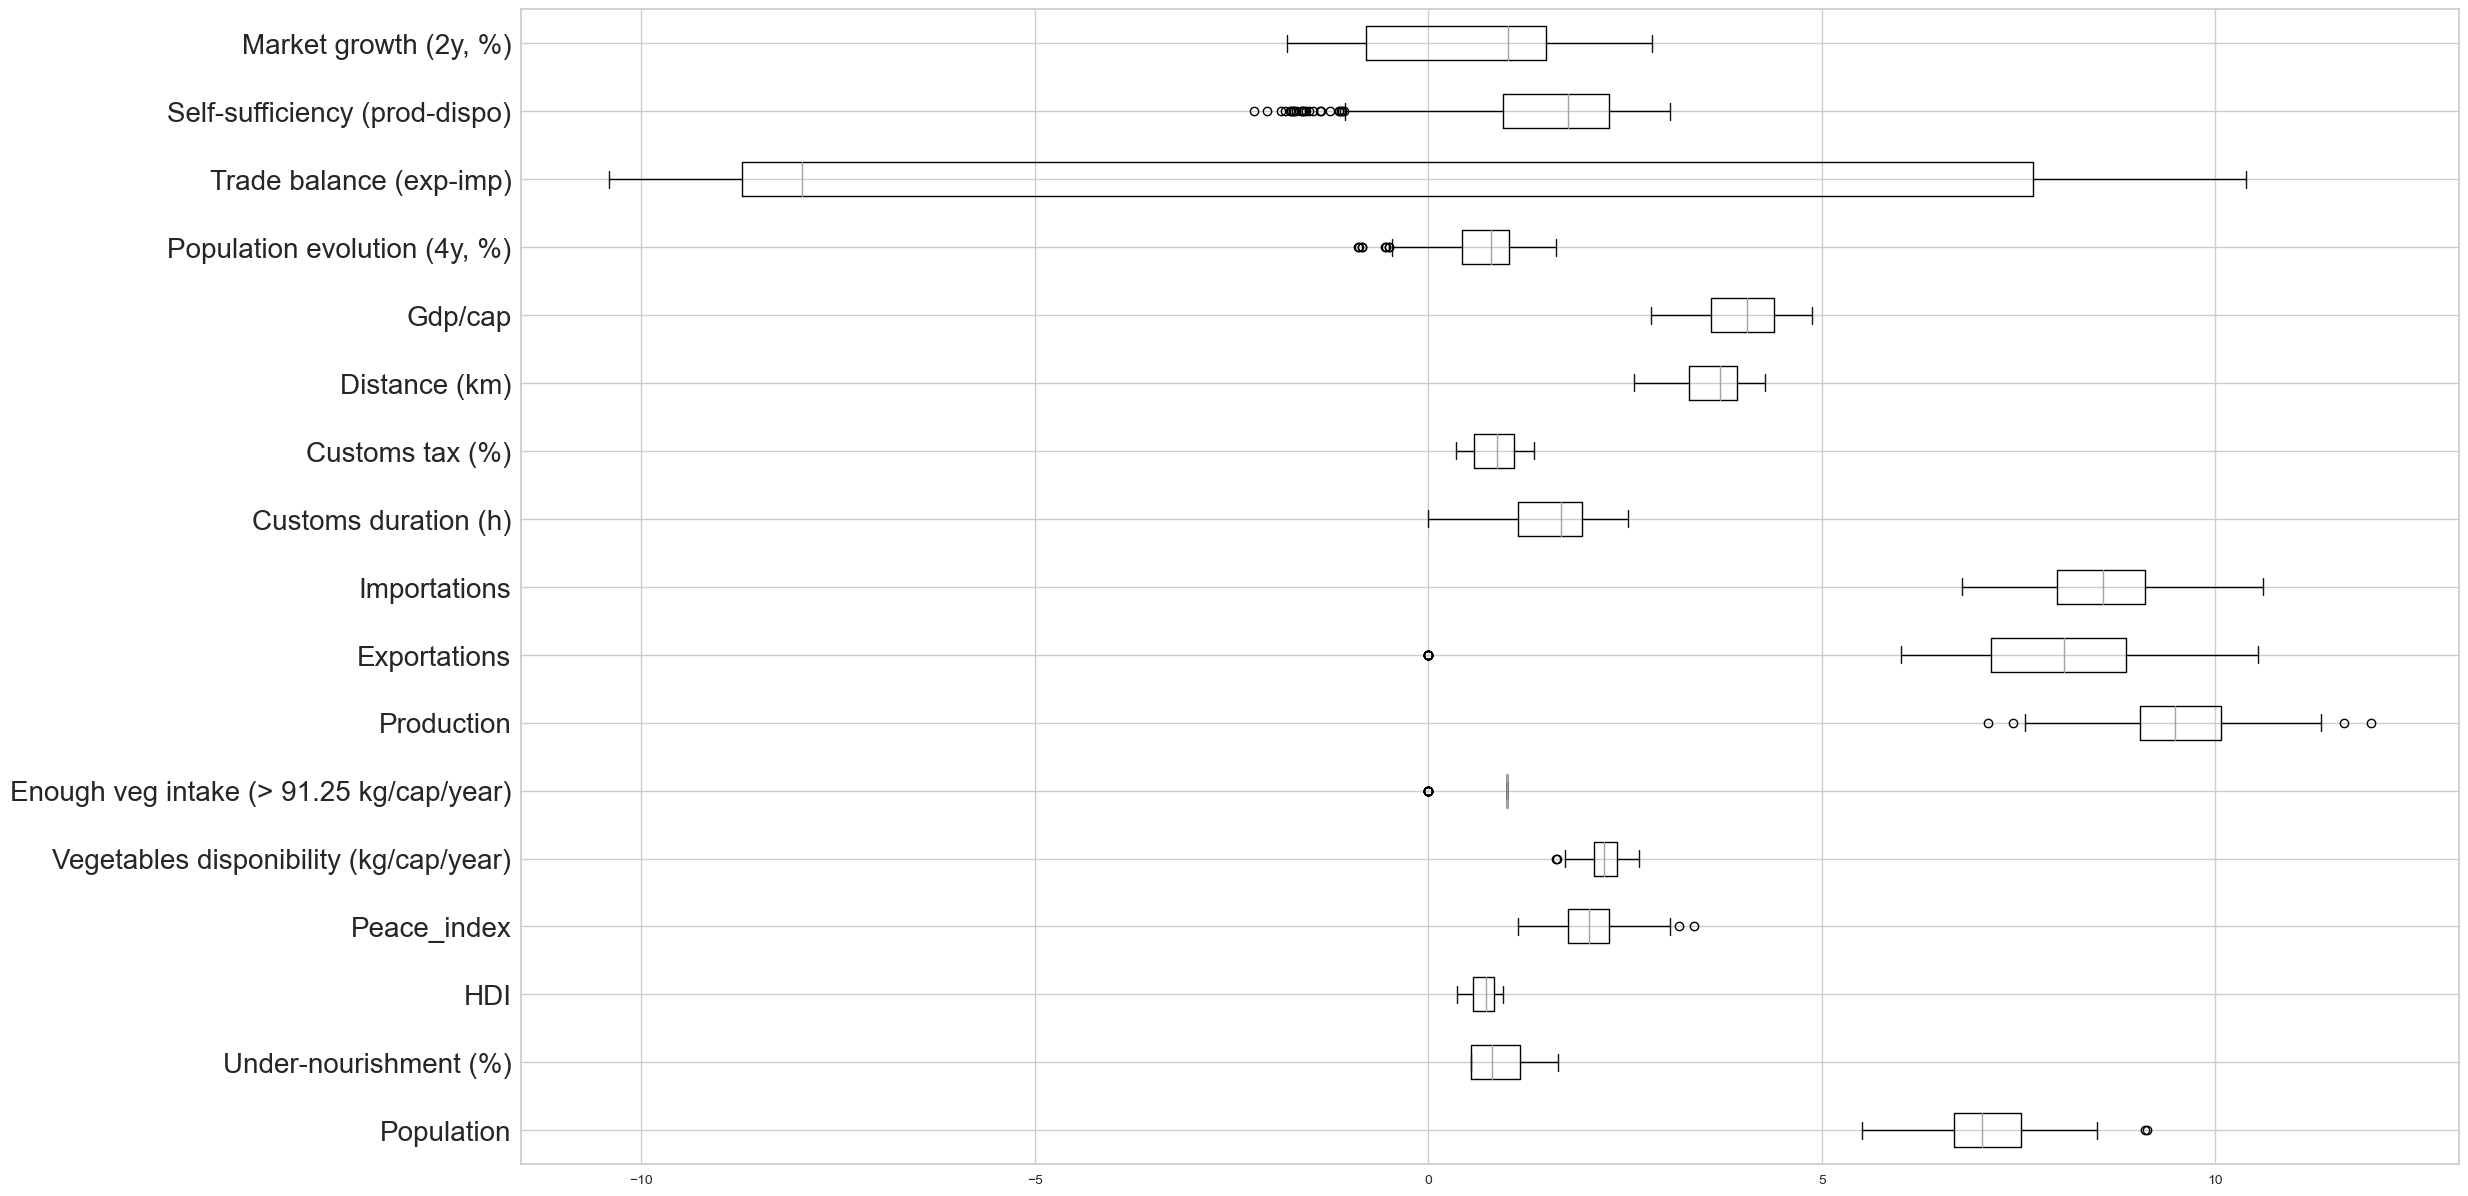

In [19]:
# création boxplots
fig=plt.figure(figsize=(25,15))
p9_log.boxplot(vert=False)
plt.yticks(size=20)
plt.show()

In [20]:
#pd.options.display.max_rows = None

# Vérification des corrélations

<span style="color:red">**Les distributions des variables n'étant pas toutes normales, nous allons utiliser le test de Spearman pour avoir un aperçu des corrélations**</span>

## Corrélation de Spearman

In [21]:
corr = p9_log.corr(method='spearman')
#corr

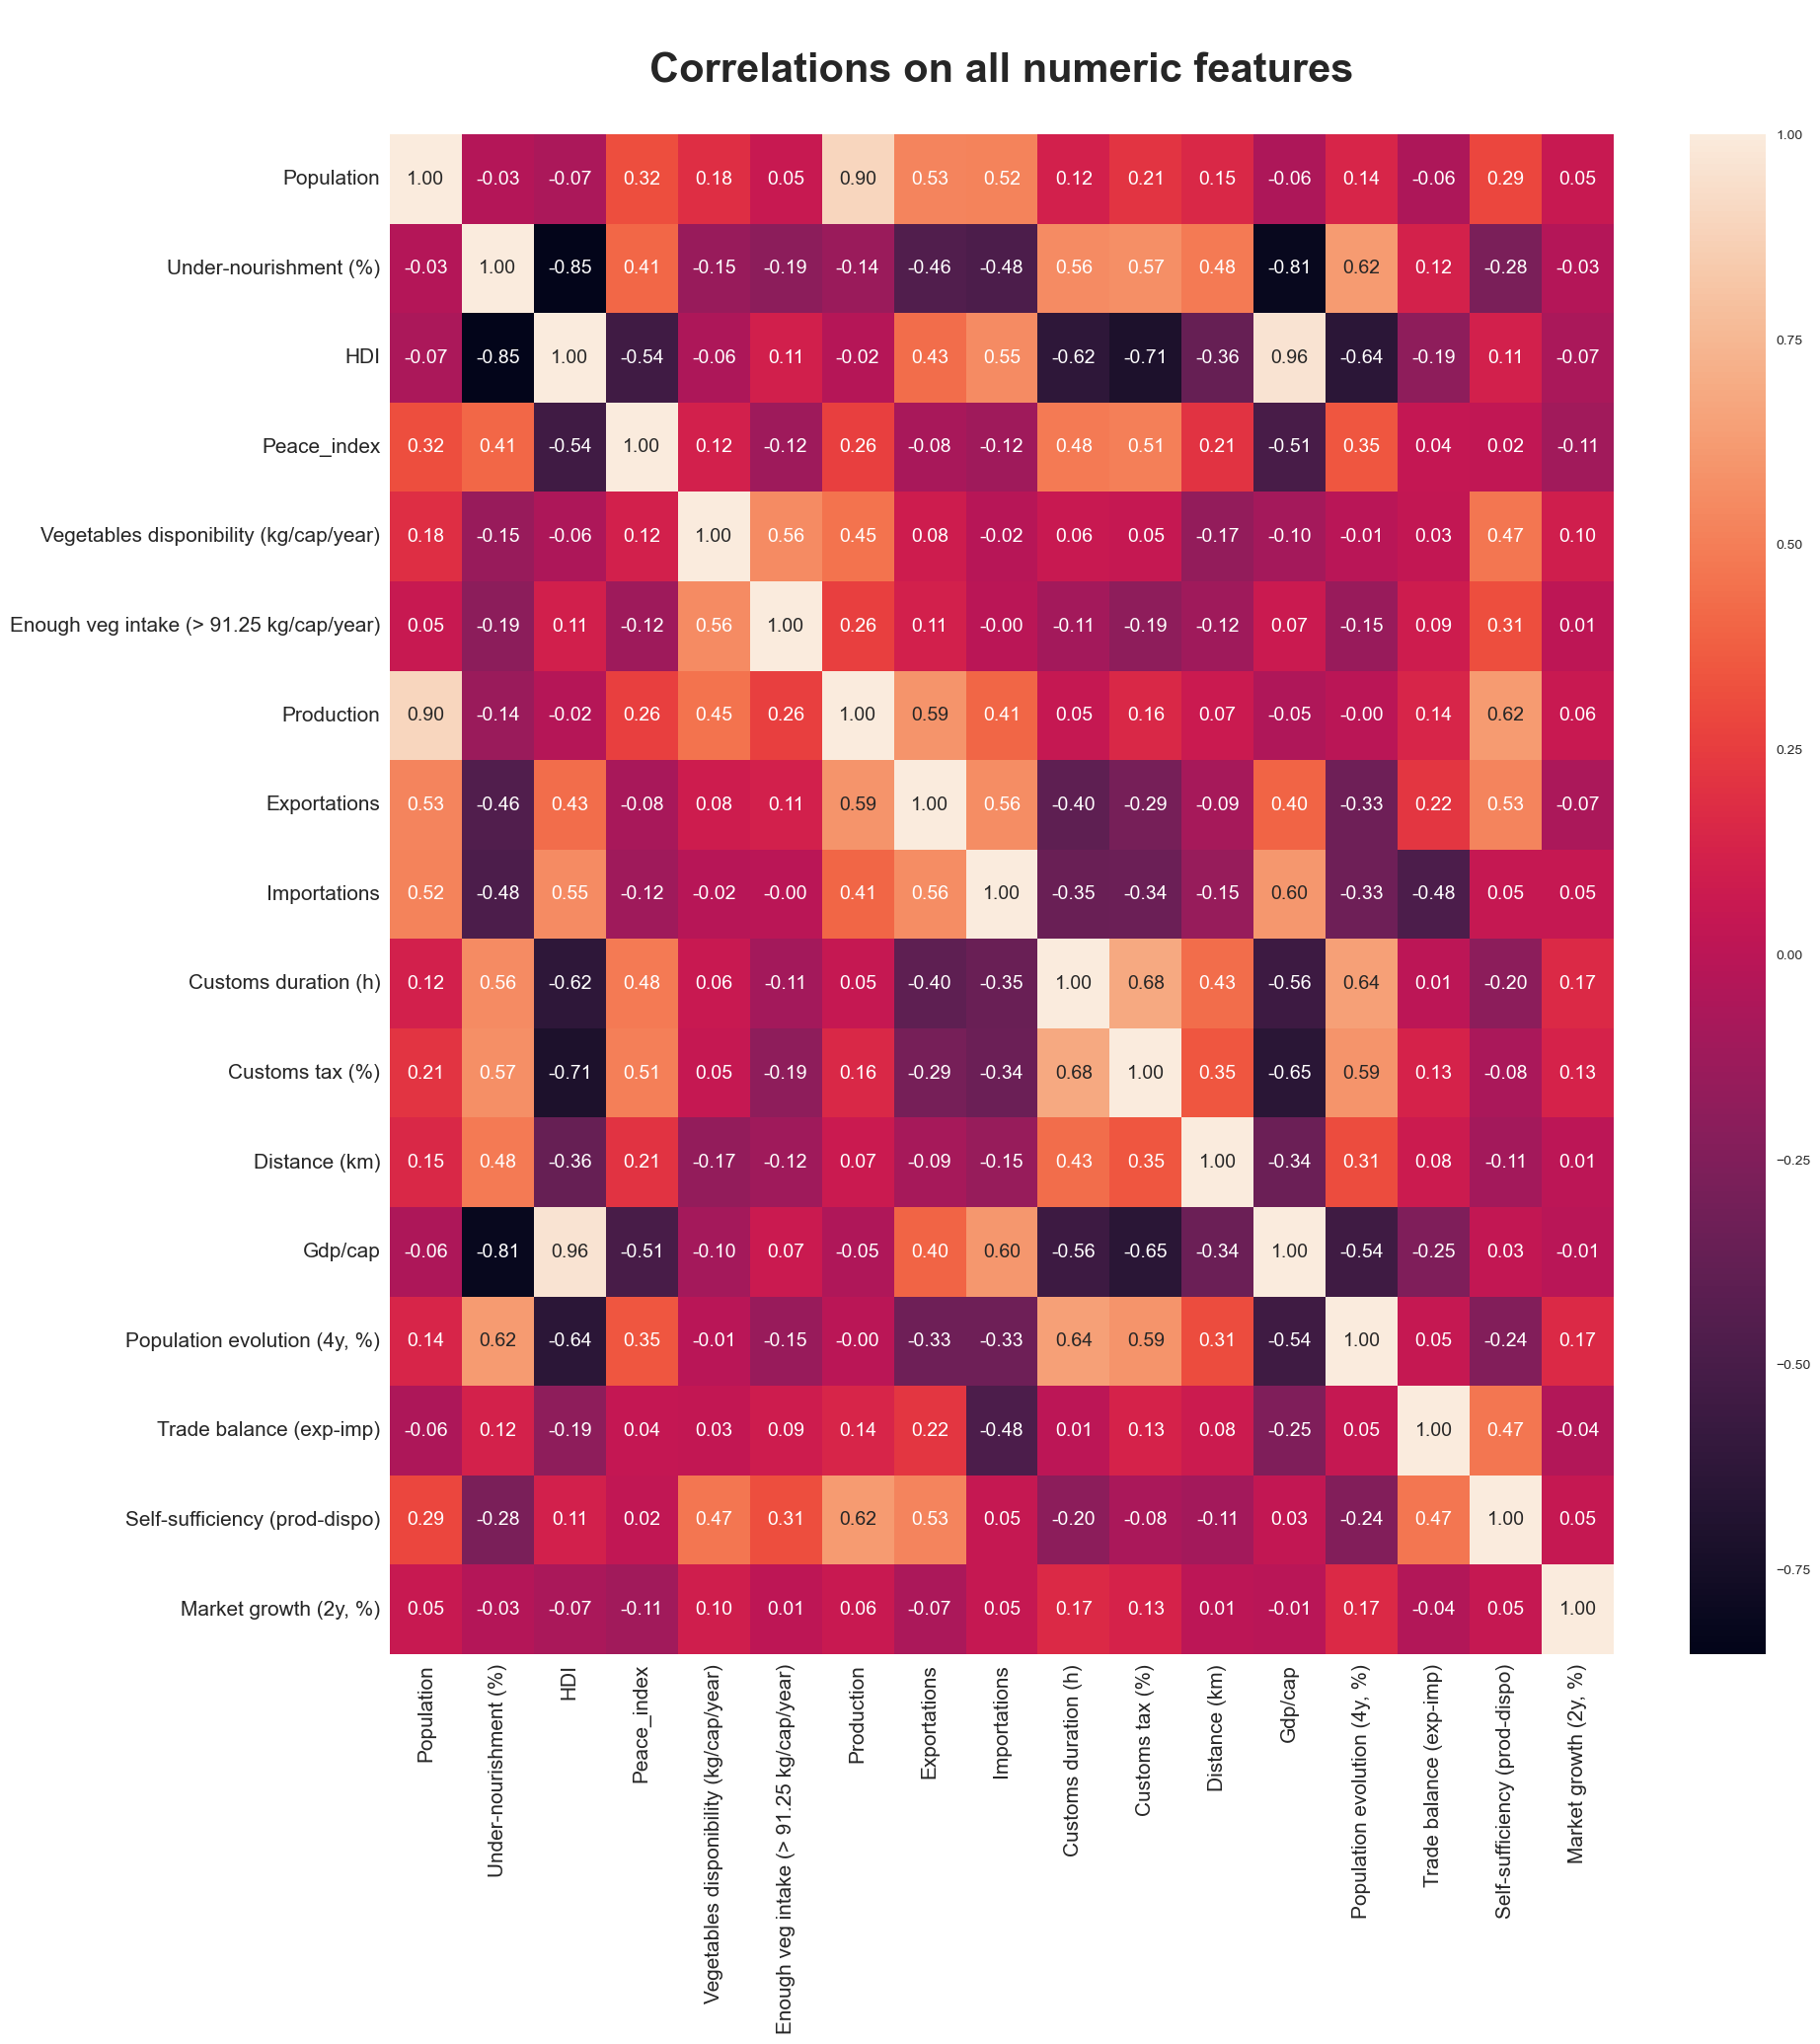

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(p9_log.corr(method='spearman'), annot=True, annot_kws={"size": 14}, fmt=".2f")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nCorrelations on all numeric features\n", size=30, fontweight='bold' )
plt.show()

''

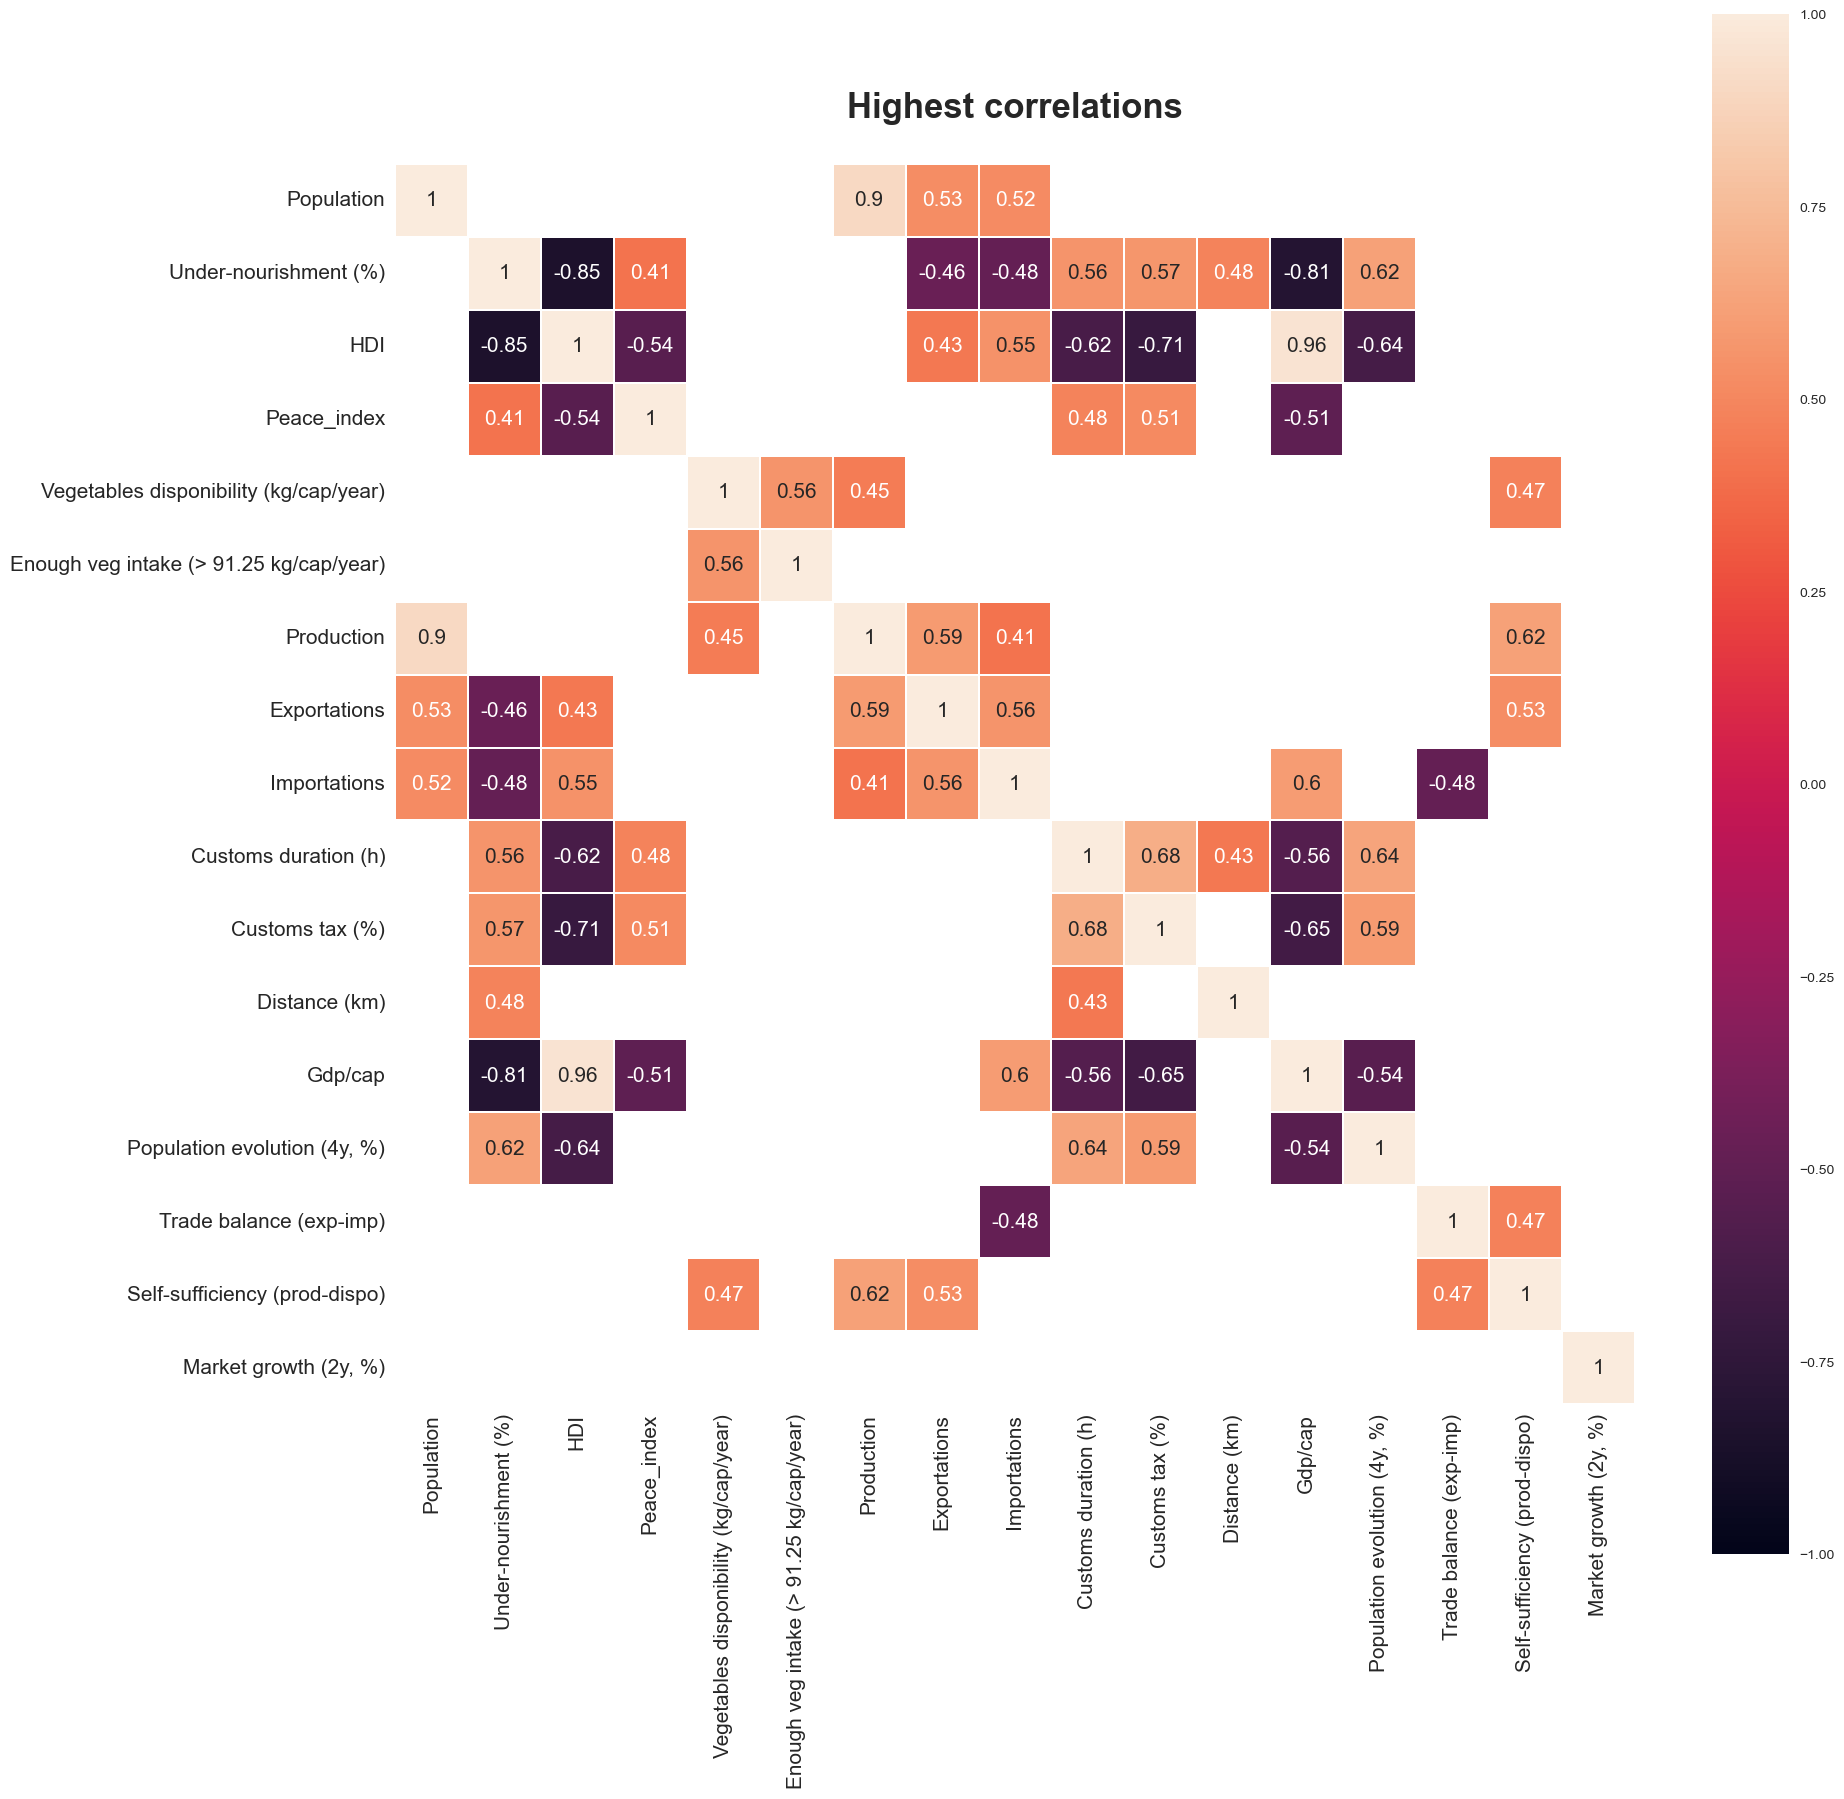

In [23]:
# Beaucoup d'informations, on va visualiser les corrélations les plus élevées
plt.figure(figsize=(20, 20))
sns.heatmap(np.round(corr, 2)[(corr >= 0.4) | (corr <= -0.4)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 15}, square=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nHighest correlations\n", size=25, fontweight='bold' )
;

# Visionnage du DataFrame final (log) avant analyse

In [24]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "background-color: #DC7633; font-style: italic; color: white; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #DC7633; color: white; text-align: center"
}

properties = {"border": "1px solid black", "width": "90px", "text-align": "center"}

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

p9_log.head(50).style.format(precision=2).highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;').set_table_styles(
    styles, [cell_hover, index_names, headers]).set_properties(**properties).set_caption('Log DataFrame')

#p9_log.style.set_sticky(axis='index')
#p9_log.style.set_table_styles([cell_hover, index_names, headers])
#cm = sns.light_palette("orange", as_cmap=True)
#p9_log.style.background_gradient(cmap=cm)

#p9_log.style.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;')

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Ecuador,7.20,0.99,0.76,2.12,1.94,0,9.31,8.08,8.44,1.99,0.92,3.98,4.05,0.88,-8.19,1.64,-1.79
Central African Republic,6.68,1.61,0.37,3.06,2.46,1,9.14,0.00,6.85,2.15,1.23,3.69,2.84,0.79,-6.85,0.71,-1.78
Ethiopia,7.99,1.27,0.44,2.50,2.04,1,10.16,8.63,7.62,1.76,1.28,3.73,3.10,1.11,8.59,1.62,-1.76
Kenya,7.65,1.31,0.55,2.51,2.34,1,10.04,8.27,8.41,1.46,1.10,3.80,3.50,1.08,-7.83,1.48,-1.72
Bolivia,7.03,1.24,0.68,2.17,2.18,1,9.42,7.83,7.92,1.69,1.04,4.00,3.81,0.90,-7.20,2.00,-1.66
Lesotho,6.32,1.31,0.49,1.88,2.36,1,8.40,6.95,8.32,0.70,0.56,3.95,3.40,0.63,-8.31,-2.05,-1.58
Timor-Leste,6.07,1.44,0.63,1.77,2.19,1,8.26,0.00,6.85,1.99,0.54,4.12,3.39,1.00,-6.85,0.64,-1.57
Zimbabwe,7.13,1.25,0.57,2.50,2.11,1,9.17,6.30,8.60,1.95,1.27,3.89,3.40,0.90,-8.60,-1.24,-1.50
Jamaica,6.44,1.03,0.71,2.19,2.23,1,8.71,7.15,8.35,1.77,1.07,3.89,3.94,0.46,-8.32,1.20,-1.49


# Exportations des fichiers

In [25]:
p9.to_excel('../src/p9_2013_cleaned.xlsx', index=False)
p9_log.to_excel('../src/p9_log_2013_cleaned.xlsx', index=True)
print("Exportation terminée")

Exportation terminée
